In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import xgboost as xg
import operator
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

OSError: /home/cs/anaconda3/lib/python3.6/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.20' not found (required by /home/cs/anaconda3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so)

In [2]:
a=pd.read_csv(r'C:\Users\123\Desktop\caixun\Caixun (1)\Caixun\data.csv')

In [3]:
a.head()

,user_id,is_actpay,cur_arrears_1M,cur_arrears_2M,cur_arrears_3M,arpu_1M,arpu_2M,arpu_3M,reduce_fee_1M,reduce_fee_2M,...,ordertype_top1,login_times_1M,login_times_2M,login_times_3M,read_times_1M,read_times_2M,read_times_3M,click_times_1M,click_times_2M,click_times_3M
0,1.0,1,0.00,0.00,0.0,406.60,327.00,314.23,0.00,0.00,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,0,0.00,0.23,0.0,28.15,15.23,72.24,37.89,12.45,...,3.0,NaN,1.0,11.0,NaN,NaN,NaN,8.0,10.0,12.0
2,3.0,0,51.76,0.00,0.0,24.39,26.38,31.71,30.20,29.60,...,3.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
3,4.0,0,NaN,NaN,0.0,NaN,NaN,20.36,NaN,NaN,...,3.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,2.0
4,5.0,0,NaN,NaN,0.0,NaN,NaN,28.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
a.isnull().sum()

user_id                     1
is_actpay                   0
cur_arrears_1M            720
cur_arrears_2M            632
cur_arrears_3M            532
arpu_1M                   720
arpu_2M                   632
arpu_3M                   532
reduce_fee_1M             720
reduce_fee_2M             632
reduce_fee_3M             532
prdct_fee_1M              720
prdct_fee_2M              632
prdct_fee_3M              532
outpkg_voice_fee_1M       720
outpkg_voice_fee_2M       632
outpkg_voice_fee_3M       532
outpkg_network_fee_1M     720
outpkg_network_fee_2M     632
outpkg_network_fee_3M     532
outpkg_mem_fee_1M         720
outpkg_mem_fee_2M         632
outpkg_mem_fee_3M         532
add_value_fee_1M          720
add_value_fee_2M          632
add_value_fee_3M          532
agent_fee_1M              943
agent_fee_2M              836
agent_fee_3M              751
roma_total_fee_1M         720
roma_total_fee_2M         632
roma_total_fee_3M         532
toll_call_fee_1M          720
toll_call_

In [5]:
a=a.drop(['login_times_1M','login_times_2M','login_times_3M','read_times_1M','read_times_2M','read_times_3M','click_times_1M','click_times_2M','click_times_3M'],axis=1)

In [6]:
a.describe()

,user_id,is_actpay,cur_arrears_1M,cur_arrears_2M,cur_arrears_3M,arpu_1M,arpu_2M,arpu_3M,reduce_fee_1M,reduce_fee_2M,...,agent_fee_3M,roma_total_fee_1M,roma_total_fee_2M,roma_total_fee_3M,toll_call_fee_1M,toll_call_fee_2M,toll_call_fee_3M,prdct_name,prov_top1,ordertype_top1
count,5999.000000,6000.000000,5280.000000,5368.000000,5468.000000,5280.000000,5368.000000,5468.000000,5280.000000,5368.000000,...,5249.000000,5280.000000,5368.000000,5468.000000,5280.000000,5368.000000,5468.000000,6000.000000,5813.000000,5813.000000
mean,3000.000000,0.500000,27.580419,28.368448,11.847959,115.759678,109.571529,114.809318,27.206157,27.705952,...,9067.698575,13.476494,13.898199,17.482707,5.984646,6.112988,7.225285,21.857333,0.548082,2.844486
std,1731.906464,0.500042,163.311149,163.847994,80.889100,603.339170,570.077029,597.860240,76.281842,74.919961,...,89614.809694,29.351850,33.333106,59.178600,13.440329,15.020713,19.791626,37.296959,3.142350,1.316645
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000
25%,1500.500000,0.000000,0.000000,0.000000,0.000000,41.800000,39.297500,39.507500,0.000000,0.000000,...,0.000000,1.140000,1.000000,1.140000,0.580000,0.570000,0.600000,-1.000000,0.000000,3.000000
50%,3000.000000,0.500000,0.000000,0.000000,0.000000,78.655000,74.400000,78.000000,0.000000,0.000000,...,0.000000,4.600000,4.200000,5.000000,2.090000,2.000000,2.470000,-1.000000,0.000000,3.000000
75%,4499.500000,1.000000,2.080000,6.702500,0.000000,135.910000,127.947500,133.405000,12.000000,14.697500,...,2.000000,13.870000,13.300000,17.480000,5.800000,5.800000,7.200000,38.000000,0.000000,3.000000
max,5999.000000,1.000000,4903.230000,4612.000000,2784.820000,34291.660000,33260.910000,35488.460000,1675.210000,1357.980000,...,901798.000000,662.920000,781.630000,3154.400000,287.200000,438.400000,860.800000,288.000000,81.000000,99.000000


In [7]:
a0=a.iloc[1:-1]

a1=a.fillna(a0.mean())
a=a1
a.describe()

,user_id,is_actpay,cur_arrears_1M,cur_arrears_2M,cur_arrears_3M,arpu_1M,arpu_2M,arpu_3M,reduce_fee_1M,reduce_fee_2M,...,agent_fee_3M,roma_total_fee_1M,roma_total_fee_2M,roma_total_fee_3M,toll_call_fee_1M,toll_call_fee_2M,toll_call_fee_3M,prdct_name,prov_top1,ordertype_top1
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.000083,0.500000,27.581046,28.369005,11.848151,115.753067,109.567262,114.806084,27.206776,27.706496,...,9067.914843,13.476801,13.898427,17.482990,5.984782,6.113022,7.225402,21.857333,0.548088,2.844485
std,1731.762108,0.500042,153.197697,154.977088,77.219166,565.975878,539.212447,570.735357,71.557897,70.863713,...,83817.995225,27.534163,31.528416,56.493671,12.608003,14.207476,18.893681,37.296959,3.092986,1.295961
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000
25%,1500.750000,0.000000,0.000000,0.000000,0.000000,46.935000,42.587500,42.460000,0.000000,0.000000,...,0.000000,1.330000,1.200000,1.250000,0.760000,0.600000,0.750000,-1.000000,0.000000,3.000000
50%,3000.250000,0.500000,0.000000,0.000000,0.000000,90.600000,84.680000,86.120000,5.000000,2.000000,...,0.000000,5.800000,5.320000,6.205000,2.850000,2.650000,3.000000,-1.000000,0.000000,3.000000
75%,4499.250000,1.000000,27.585643,28.373734,0.000000,125.625000,119.085000,125.740000,27.211311,27.711114,...,8.000000,13.479047,13.900363,17.485905,5.985780,6.113313,7.226607,38.000000,0.000000,3.000000
max,5999.000000,1.000000,4903.230000,4612.000000,2784.820000,34291.660000,33260.910000,35488.460000,1675.210000,1357.980000,...,901798.000000,662.920000,781.630000,3154.400000,287.200000,438.400000,860.800000,288.000000,81.000000,99.000000


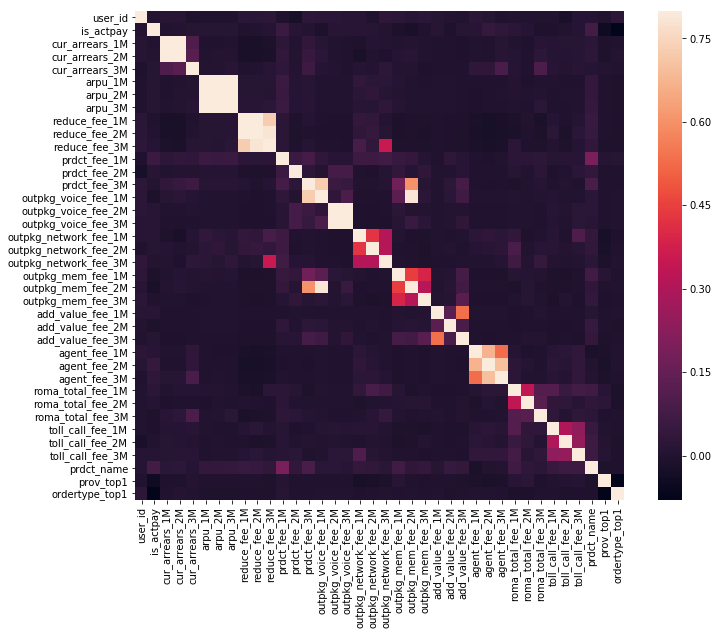

In [8]:
#correlation matrix
corrmat = a.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
def compare(x):
    if x>0:x=1
    return int(x)


b=a[["cur_arrears_1M","cur_arrears_2M",'cur_arrears_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['cur_arrears']
a=pd.concat([a,b],axis=1)
a=a.drop(["cur_arrears_1M","cur_arrears_2M",'cur_arrears_3M'],axis=1)

b=a[["arpu_1M","arpu_2M",'arpu_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['arpu']
a=pd.concat([a,b],axis=1)
a=a.drop(["arpu_1M","arpu_2M",'arpu_3M'],axis=1)

b=a[["reduce_fee_1M","reduce_fee_2M",'reduce_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['reduce_fee']
a=pd.concat([a,b],axis=1)
a=a.drop(["reduce_fee_1M","reduce_fee_2M",'reduce_fee_3M'],axis=1)
     
b=a[["prdct_fee_1M","prdct_fee_2M",'prdct_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['prdct_fee']
a=pd.concat([a,b],axis=1)
a=a.drop(["prdct_fee_1M","prdct_fee_2M",'prdct_fee_3M'],axis=1)
     
a=a.drop(["outpkg_voice_fee_1M","outpkg_voice_fee_2M",'outpkg_voice_fee_3M'],axis=1)
a=a.drop(["outpkg_mem_fee_1M","outpkg_mem_fee_2M",'outpkg_mem_fee_3M'],axis=1)
a=a.drop(["prov_top1"],axis=1)
a=a.drop(['agent_fee_1M','agent_fee_2M','agent_fee_3M'],axis=1)
     
b=a[["outpkg_network_fee_1M","outpkg_network_fee_2M",'outpkg_network_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['outpkg_network_fee']
a=a=pd.concat([a,b],axis=1)
a=a.drop(["outpkg_network_fee_1M","outpkg_network_fee_2M",'outpkg_network_fee_3M','roma_total_fee_1M',
        'roma_total_fee_2M','roma_total_fee_3M','toll_call_fee_1M','toll_call_fee_2M','toll_call_fee_3M'
],axis=1)
     
b=a[["add_value_fee_1M","add_value_fee_2M",'add_value_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['add_value_fee']
a=pd.concat([a,b],axis=1)
a=a.drop(["add_value_fee_1M","add_value_fee_2M",'add_value_fee_3M'],axis=1)




#b=a['arpu']
#b=b.apply(lambda x:500 if x>500 else x)
#b=pd.DataFrame(b)
#b.columns=['arpu']
#a=a.drop(["arpu"],axis=1)
#a=pd.concat([b,a],axis=1)



    

In [10]:
a=a.drop(["user_id"],axis=1)
a=a.drop(["prdct_name"],axis=1)
a.columns

Index(['is_actpay', 'ordertype_top1', 'cur_arrears', 'arpu', 'reduce_fee',
       'prdct_fee', 'outpkg_network_fee', 'add_value_fee'],
      dtype='object')

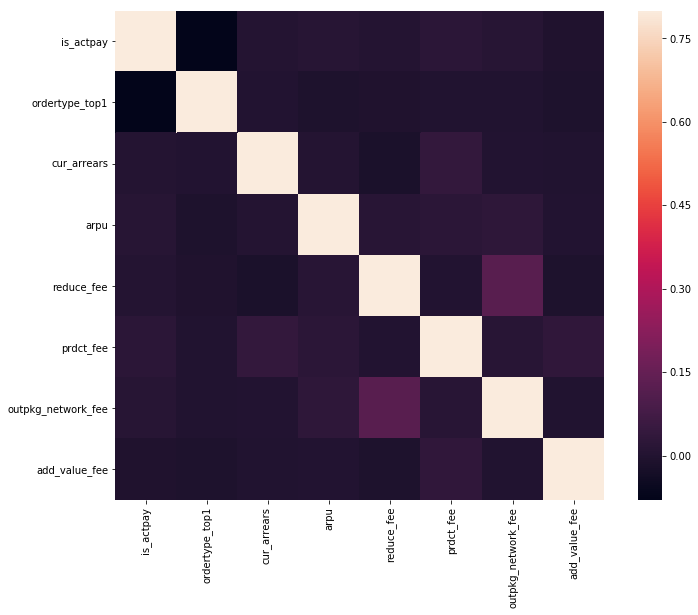

In [11]:
#correlation matrix
corrmat = a.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
a[['ordertype_top1', 'is_actpay']].groupby(['ordertype_top1'], as_index=False).mean().sort_values(by='ordertype_top1', ascending=True)

,ordertype_top1,is_actpay
0,2.000000,0.776000
1,2.844433,0.016043
2,3.000000,0.461554
3,99.000000,0.000000


In [13]:
b=a['is_actpay']
b=pd.DataFrame(b)
b.columns=['ispay']

a=a.drop(["is_actpay"],axis=1)


In [14]:
#a['arpu_g'] = pd.cut(a['arpu'], 5)
#a[['arpu_g', 'ispay']].groupby(['arpu_g'], as_index=False).mean().sort_values(by='arpu_g', ascending=True)


In [15]:
#for dataset in [a]:    
#    dataset.loc[ dataset['arpu'] <= 100, 'arpu'] = 0
#    dataset.loc[(dataset['arpu'] > 100) & (dataset['arpu'] <= 200), 'arpu'] = 1
#    dataset.loc[(dataset['arpu'] > 200) & (dataset['arpu'] <= 300), 'arpu'] = 2
#    dataset.loc[(dataset['arpu'] > 300) & (dataset['arpu'] <= 400), 'arpu'] = 3
#    dataset.loc[ dataset['arpu'] > 400, 'arpu']
#a.head()

In [17]:


b=pd.DataFrame(b)
b.to_csv(r'C:\Users\123\Desktop\caixun\data\data_y.csv',index=False)
feat = a.columns
a.to_csv(r'C:\Users\123\Desktop\caixun\data\data.csv',index=False)

In [18]:
b.head()

,ispay
0,1
1,0
2,0
3,0
4,0


In [19]:
modeldata = pd.read_csv(r'C:\Users\123\Desktop\caixun\data\data.csv')
y = pd.read_csv(r'C:\Users\123\Desktop\caixun\data\data_y.csv')
print(len(modeldata))
print(len(y))

from sklearn import cross_validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(modeldata, y, test_size=0.3, random_state=10)


x_train.to_csv(r'C:\Users\123\Desktop\caixun\data\x_train.csv',index=False)
x_test.to_csv(r'C:\Users\123\Desktop\caixun\data\x_test.csv',index=False)
y_train.to_csv(r'C:\Users\123\Desktop\caixun\data\y_train.csv',index=False)
y_test.to_csv(r'C:\Users\123\Desktop\caixun\data\y_test.csv',index=False)






6000
6000


In [20]:
clf = LinearSVC()
model = clf.fit(x_train, y_train.values.ravel())
acc_svc = round(clf.score(x_test, y_test) * 100, 2)
acc_svc

57.280000000000001

In [21]:
y_test.head()

,ispay
1789,1
5566,0
1657,1
3983,0
5619,1


In [22]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

58.109999999999999

In [23]:
coeff_df = pd.DataFrame(a.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=True)

,Feature,Correlation
0,cur_arrears,-1.267595
2,reduce_fee,-0.000027
3,prdct_fee,0.000093
4,outpkg_network_fee,0.000212
1,arpu,0.000401
5,add_value_fee,0.001251


In [24]:
clf = xg.XGBClassifier(n_estimators=25,
                        nthread=-1,
                        max_depth=10,
                        learning_rate=0.025,
                        silent=True,
                        subsample=0.8,
                        colsample_bytree=0.8,
                      scale_pos_weight=1,
                      gamma=0.05)
clf.fit(x_train, y_train.values.ravel(), eval_metric="auc")
Y_pred = clf.predict(x_test)


acc_log = round(clf.score(x_test, y_test) * 100, 2)
acc_log


59.390000000000001

In [25]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
def fmap(features,importance):
    return (features, importance)

[0]	eval-logloss:0.678027	train-logloss:0.677981
[1]	eval-logloss:0.675833	train-logloss:0.675334
[2]	eval-logloss:0.665959	train-logloss:0.66544
[3]	eval-logloss:0.659199	train-logloss:0.658672
[4]	eval-logloss:0.658924	train-logloss:0.657158
[5]	eval-logloss:0.654295	train-logloss:0.652473
[6]	eval-logloss:0.651029	train-logloss:0.649136
[7]	eval-logloss:0.650058	train-logloss:0.647876
[8]	eval-logloss:0.647698	train-logloss:0.645513
[9]	eval-logloss:0.646082	train-logloss:0.643795
[10]	eval-logloss:0.64533	train-logloss:0.642694
[11]	eval-logloss:0.644098	train-logloss:0.64144
[12]	eval-logloss:0.643255	train-logloss:0.640476
[13]	eval-logloss:0.643149	train-logloss:0.639727
[14]	eval-logloss:0.642415	train-logloss:0.63903
[15]	eval-logloss:0.64192	train-logloss:0.638476
[16]	eval-logloss:0.641595	train-logloss:0.637889
[17]	eval-logloss:0.641482	train-logloss:0.637308
[18]	eval-logloss:0.641487	train-logloss:0.636686
[19]	eval-logloss:0.641424	train-logloss:0.636147
[20]	eval-loglo

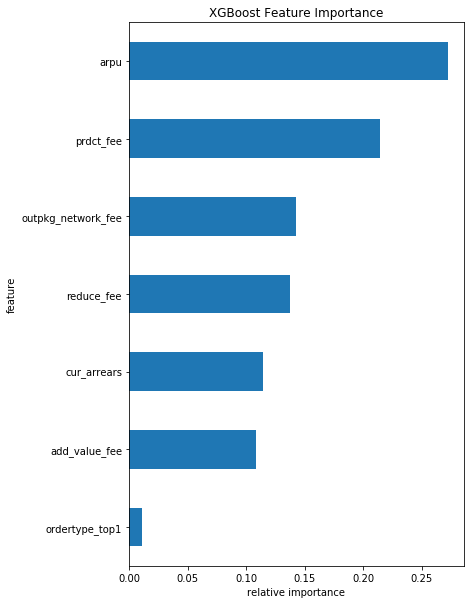

In [33]:
df=a
dtrain = xg.DMatrix(x_train, label=y_train)
dtest = xg.DMatrix(x_test, label=y_test)
    #######参数待调
param = {'learning_rate': 0.2, 'n_estimators': 1000, 'max_depth': 2,
             'min_child_weight': 3, 'gamma': 0, 'subsample': 1.0, 'colsample_bytree': 0.8,
             'scale_pos_weight': 1, 'eta': 0.05, 'silent': 1, 'objective': 'binary:logistic'}
num_round = 5000
param['eval_metric'] = "logloss"
plst = param.items()
evallist = [(dtest, 'eval'), (dtrain, 'train')]
bst = xg.train(plst, dtrain, num_round, evallist)
acc_xgb = round(clf.score(x_test, y_test) * 100, 2)
print(acc_log)
    #####xgb特征筛选
features = df.columns
create_feature_map(features)
importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
df_importance = pd.DataFrame(importance, columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()
df_importance.to_csv(r"C:\Users\123\Desktop\caixun\data\model\xgb_feat_importance.csv", index=False)
    ######画图
plt.figure()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

59.44


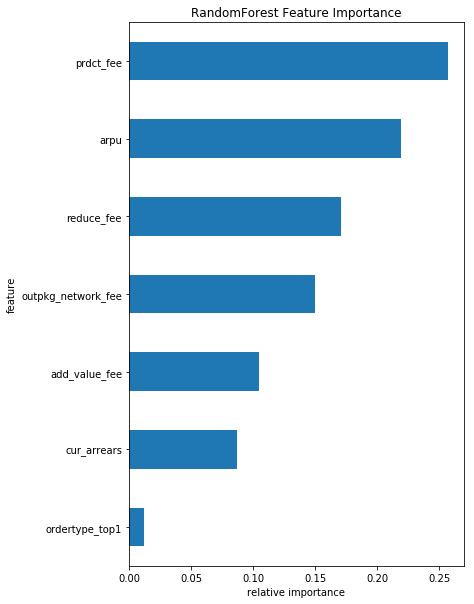

[('ordertype_top1', 0.012021512), ('cur_arrears', 0.087314144), ('add_value_fee', 0.10439734), ('outpkg_network_fee', 0.14995255), ('reduce_fee', 0.17051566), ('arpu', 0.21891807), ('prdct_fee', 0.25688073)]


In [27]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train.values.ravel())
random_forest.score(x_test, y_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
acc_random_forest

print(acc_random_forest)
######输出各feature重要性
importance = map(fmap, feat, clf.feature_importances_)
importance = list(importance)
importance = sorted(importance, key=lambda d: d[1])
#####
df_importance = pd.DataFrame(importance, columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()
df_importance.to_csv(r"C:\Users\123\Desktop\caixun\data\model\RF_feat_importance.csv", index=False)
######画图
plt.figure()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('RandomForest Feature Importance')
plt.xlabel('relative importance')
plt.show()
print(importance)

In [28]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train.values.ravel())
acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
acc_linear_svc

53.280000000000001

In [29]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train.values.ravel())
acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
acc_sgd

48.219999999999999

In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

54.609999999999999

In [31]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc

c:\users\123\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


53.0

In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',  'Logistic Regression', 
              'Random Forest', 
             'Linear SVC', 
              'Decision Tree','Xgboost'],
    'Score': [acc_svc, acc_log, 
              acc_random_forest, 
              acc_linear_svc, acc_decision_tree,acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,59.44
1,Logistic Regression,59.39
5,Xgboost,59.39
4,Decision Tree,54.61
3,Linear SVC,53.28
0,Support Vector Machines,53.00
